# PHYS 139 Final Project

In [2]:
from collections import defaultdict
import random as random

from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
# Plot formatting
font = dict(family='Times New Roman',
            weight='normal',
            size=20)
rc('font', **font)
rcParams['figure.figsize'] = 9, 6
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.size'] = 14
rcParams['font.weight'] = 'normal'
rcParams['axes.linewidth'] = 0.3
rcParams['axes.labelsize'] = 16
rcParams['lines.linewidth'] = 1

## Part A

We have no guess as to where our changepoint is, therefore we will assign it a uniform prior,

$$P(n_0)= \frac{1}{N}.$$

We will assume that the number of mine accidents each year, $x_n$ are modeled by the Poisson distribution,

$$P(x|\lambda) = \frac{\left(\lambda\tau\right)^x}{x!}\exp{\left(-\lambda\tau\right)}.$$

or, for $\tau=1,$

$$P(x|\lambda) = \frac{\lambda^x}{x!}\exp{-\lambda}.$$


We assume that the observations have been genrated by two different Poisson distributions; $P\left(x|\lambda_1\right)$ before the change point, and $P\left(x|\lambda_2\right)$ after. The only information we have on $\lambda_1$ and $\lambda_2$ is that they are distribted according to a prior gamma distribution,

$$P\left(\lambda\right) = Gamma\left(\lambda|a,b\right) = \frac{1}{\Gamma\left(a\right)}b^a\lambda^{a-1}\exp\left(-b\lambda\right).$$

The join gamma distribution is,

$$P\left(x_{1:N}|\lambda_1, \lambda_2, n_0\right) = \prod_{n=1}^{n_0}P(x_n|\lambda_1)\prod_{n=n_0+1}^NP(x_n|\lambda_2).$$

Bayes tells us,

$$P(n_0, \lambda_1,\lambda_2,x_{1:N}) \propto P\left(x_{1:N}|\lambda_1, \lambda_2, n_0\right)P(\lambda_1)P(\lambda_2)P(n_0)$$

or,

$$P(n_0, \lambda_1,\lambda_2,x_{1:N}) \propto \prod_{n=1}^{n_0}P(x_n|\lambda_1)\prod_{n=n_0+1}^NP(x_n|\lambda_2)P(\lambda_1)P(\lambda_2)P(n_0).$$

Pluggin in each distribution we get,

$$P(n_0, \lambda_1,\lambda_2,x_{1:N}) \propto \prod_{n=1}^{n_0}\frac{\lambda_1^{x_n}}{x_n!}\exp(-\lambda_1)\prod_{n=n_0+1}^N\frac{\lambda_2^{x_n}}{x_n!}\exp(-\lambda_2)\frac{1}{\Gamma(a)}b^a\lambda_1^{a-1}\exp(-b\lambda_1)\frac{1}{\Gamma(a)}b^a\lambda_2^{a-1}\exp(-b\lambda_2)\frac{1}{N}$$

$$=\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n}\exp(-n_0\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n}\exp(-(N-n_0)\lambda_2)\frac{1}{\Gamma(a)}b^a\lambda_1^{a-1}\exp(-b\lambda_1)\frac{1}{\Gamma(a)}b^a\lambda_2^{a-1}\exp(-b\lambda_2)\frac{1}{N}$$

$$=\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)\frac{1}{\Gamma(a)}b^a\frac{1}{\Gamma(a)}b^a\frac{1}{N}$$

$$=\frac{1}{N}\frac{1}{\Gamma^2(a)}b^{2a}\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)$$

$$=C\lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2)$$

where $C = \frac{1}{N}\frac{1}{\Gamma^2(a)}b^{2a}\prod_{n=1}^{N}\left(\frac{1}{x_n!}\right)$ is just a normalizatin constant.

Thus,

$$P(n_0, \lambda_1,\lambda_2,x_{1:N}) \propto \lambda_1^{\sum_{n=1}^{n_0}x_n+a-1}\exp(-(n_0+b)\lambda_1)\lambda_2^{\sum_{n=n_0+1}^{N}x_n+a-1}\exp(-(N-n_0+b)\lambda_2).$$

We define the following quantities,

$$a_1 = a + \sum_{n=1}^{n_0}x_n$$
$$b_1 = b+n_0$$
$$a_2 = a + \sum_{n=n_0+1}^{N}x_n$$
$$b_2 = b + N-n_0.$$

We can rewrite the joint probability as,

$$P(n_0, \lambda_1,\lambda_2, x_{1:N}) \propto \lambda_1^{a_1-1}\exp(-b_1\lambda_1)\lambda_2^{a_2-1}\exp(-b_2\lambda_2).$$

From this result we can see that $\lambda_1\sim Gamma(a_1, b_1)$ and $\lambda_2\sim Gamma(a_2, b_2).$

Furthermore,

$$\log{\left(P(n_0, \lambda_1,\lambda_2,x_{1:N})\right)} \propto\log{(\lambda_1^{a_1-1}\exp(-b_1\lambda_1)\lambda_2^{a_2-1}\exp(-b_2\lambda_2))}$$

$$= \log{(\lambda_1^{a_1-1})}+\log{(\exp(-b_1\lambda_1))}+\log{(\lambda_2^{a_2-1})}+\log{(\exp(-b_2\lambda_2))}$$

Thus,

$$\log{\left(P(n_0, \lambda_1,\lambda_2,x_{1:N})\right)} \propto(a_1-1)\lambda_1-b_1\lambda_1+(a_2-1)\lambda_2-b_2\lambda_2$$

## Mine Accident Data

In [4]:
data = pd.read_csv('mine_data.csv')

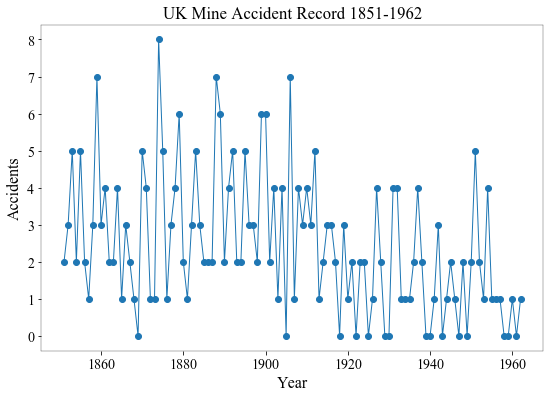

In [5]:
plt.plot('year', 'accidents', '-o', data=data)
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('UK Mine Accident Record 1851-1962')
#plt.savefig('uk_mine_accident_record', dpi=300)
plt.show()

In [44]:
def gibbs(steps, data):
    # Constants and Initial Positions
    a1 = a2 = b1 = b2 = 3
    n_0 = 61
    track_lambda_1 = []
    track_lambda_2 = []
    track_year = []
    
    years = data.year.values
    accidents = data.accidents.values
    # After Change at n_0
    lambda_2 = np.random.gamma(a2 + np.sum(accidents[n_0:]), 1./(len(years) - n_0 + b2))
    
    for step in range(steps):
        # Before Change at n_0
        lambda_1 = np.random.gamma(a1 + np.sum(accidents[:n_0]), 1./(n_0 + b1))
        
        # Get the probability for each n based on lambda_1 and lambda_2
        p_of_n_0 = [np.exp(np.log(lambda_1) * np.sum(accidents[:y]) - lambda_1 * y 
                  + np.log(lambda_2) * np.sum(accidents[y:]) - lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]
        
        probs = p_of_n_0/np.sum(p_of_n_0)  # Normlaize probabilities
        n_0 = random.choices(list(range(len(years)))[:-1], weights=probs)[0]
        
        # After Change at n_0
        lambda_2 = np.random.gamma(a2 + np.sum(accidents[n_0:]), 1./(len(years) - n_0 + b2))
        
        # Get the probability for each n based on lambda_1 and lambda_2
        p_of_n_0 = [np.exp(np.log(lambda_1) * np.sum(accidents[:y]) - lambda_1 * y 
                  + np.log(lambda_2) * np.sum(accidents[y:]) - lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]
        
        probs = p_of_n_0/np.sum(p_of_n_0)  # Normlaize probabilities
        n_0 = random.choices(list(range(len(years)))[:-1], weights=probs)[0]

        # Add values to our trackers
        track_lambda_1.append(lambda_1)
        track_lambda_2.append(lambda_2)
        track_year.append(years[n_0])
        
    return track_lambda_1, track_lambda_2, track_year


def metropolis(steps, data):
    # Constants and Initial Positions
    a1 = a2 = b1 = b2 = 3
    n_0 = 61
    track_lambda_1 = []
    track_lambda_2 = []
    track_year = []
    
    years = data.year.values
    accidents = data.accidents.values

    while len(track_lambda_1) < steps:
        # Before Change at n_0
        lambda_1 = np.random.gamma(a1 + np.sum(accidents[:n_0]), 1./(n_0 + b1))
        
        # After Change at n_0
        lambda_2 = np.random.gamma(a2 + np.sum(accidents[n_0:]), 1./(len(years) - n_0 + b2))
        
        # Get the probability for each n based on lambda_1 and lambda_2
        p_of_n_0 = [np.exp(np.log(lambda_1) * np.sum(accidents[:y]) - lambda_1 * y 
                  + np.log(lambda_2) * np.sum(accidents[y:]) - lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]

        probs = p_of_n_0/np.sum(p_of_n_0)  # Normlaize probabilities
        prop_n_0 = random.choices(list(range(len(years)))[:-1], weights=probs)[0]
        
        # Metropolis accept/reject algorithm
        if probs[prop_n_0] > probs[n_0]:
            # Add values to our trackers
            n_0 = prop_n_0
            track_lambda_1.append(lambda_1)
            track_lambda_2.append(lambda_2)
            track_year.append(years[n_0])
        elif random.random() < probs[prop_n_0]/probs[n_0]:
            n_0 = prop_n_0
            track_lambda_1.append(lambda_1)
            track_lambda_2.append(lambda_2)
            track_year.append(years[n_0])
    
    return track_lambda_1, track_lambda_2, track_year

In [45]:
steps = int(2e4)
l1, l2, change_year = gibbs(steps, data)

## Part C

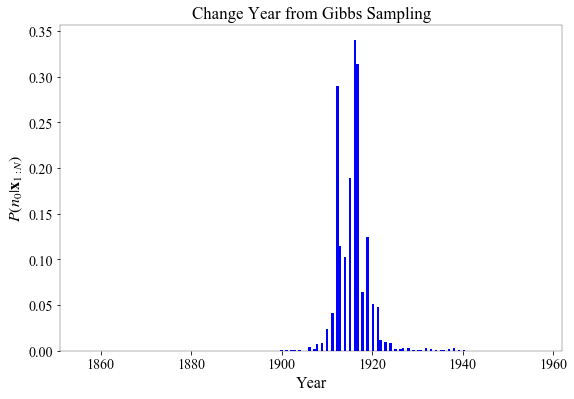

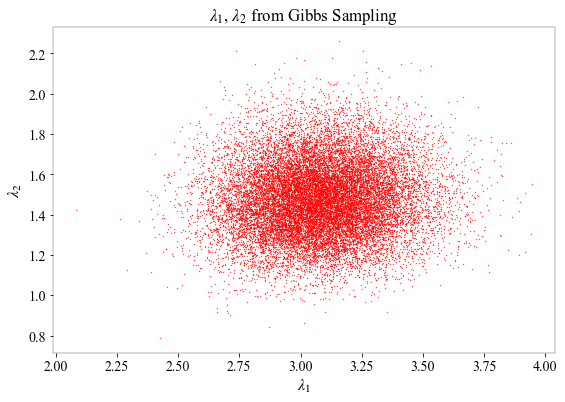

In [46]:
plt.hist(change_year, 100, color='b', label='$n_0$', density=True)
plt.xlim(1851, 1962)
plt.xlabel('Year')
plt.ylabel('$P(n_0|\mathbf{x}_{1:N})$')
plt.title('Change Year from Gibbs Sampling')
#plt.savefig('gibbs_hist', dpi=300)
plt.show()

plt.scatter(l1, l2, color='r', s=0.1)
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.title('$\lambda_1$, $\lambda_2$ from Gibbs Sampling')
#plt.savefig('gibbs_scatter', dpi=300)
plt.show()

## Part D

In [47]:
print('mean(change_year) = ', np.mean(change_year))
print('mean(lambda_1) =    ', np.mean(l1))
print('mean(lambda_2) =    ', np.mean(l2))

mean(change_year) =  1915.665
mean(lambda_1) =     3.079316906860238
mean(lambda_2) =     1.4789159866805264


## Part E

In [48]:
def factor(n):
    factors = []
    for i in range(1, int(n/2+1)):
        if n%i == 0:
            factors.append(i)
    factors.append(n)
    return factors


def get_means(data):
    means = defaultdict(list)
    vars = defaultdict(list)
    errs = defaultdict(float)
    factors = factor(len(data))
    dfs = [np.split(data, _) for _ in factors]
    for bins in dfs:
        for df in bins:
            means[len(bins)].append(df.mean())
            vars[len(bins)].append(df.var())
    for key in means.keys():
        errs[key] = np.sqrt(np.var(means[key], axis=0)/key)
    return means, errs

In [49]:
l1_means, l1_errs = get_means(np.array(l1))
l2_means, l2_errs = get_means(np.array(l2))
change_year_means, change_year_errors = get_means(np.array(change_year))

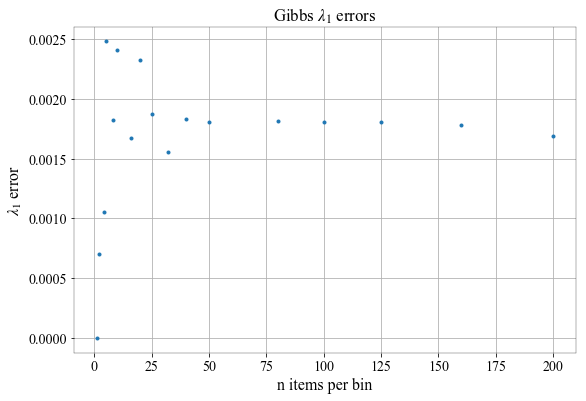

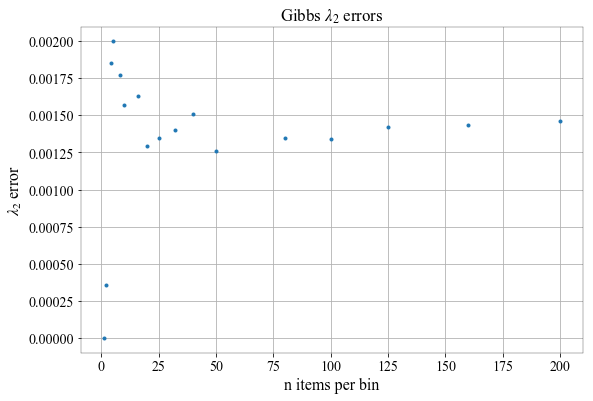

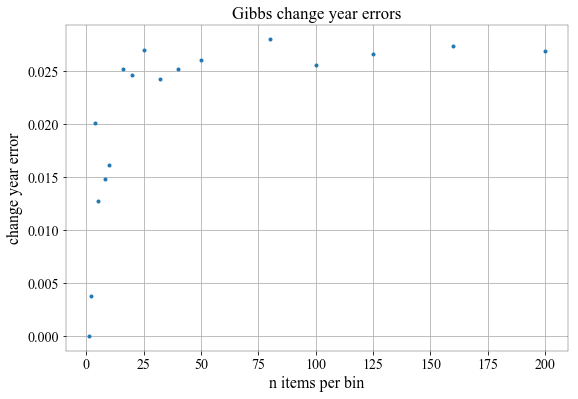

In [54]:
n = -int(0.45*len(l1_errs))

rcParams['axes.grid']=True
plt.plot(list(l1_errs)[:n], list(l1_errs.values())[:n], '.')
plt.title('Gibbs $\lambda_1$ errors')
plt.xlabel('n items per bin')
plt.ylabel('$\lambda_1$ error')
plt.savefig('gibbs_l1_error', dpi=300)
plt.show()

plt.plot(list(l2_errs)[:n], list(l2_errs.values())[:n], '.')
plt.title('Gibbs $\lambda_2$ errors')
plt.xlabel('n items per bin')
plt.ylabel('$\lambda_2$ error')
plt.savefig('gibbs_l2_error', dpi=300)
plt.show()

plt.plot(list(change_year_errors)[:n], list(change_year_errors.values())[:n], '.')
plt.title('Gibbs change year errors')
plt.xlabel('n items per bin')
plt.ylabel('change year error')
plt.savefig('gibbs_change_year_error', dpi=300)
plt.show()
rcParams['axes.grid']=False

In [53]:
print('N of items per bin: ', list(l1_errs)[n-1])
print('lambda_1 error:     ', list(l1_errs.values())[n-1])
print('lambda_2 error:     ', list(l2_errs.values())[n-1])
print('change year error:  ', list(change_year_errors.values())[n-1])

N of items per bin:  200
lambda_1 error:      0.0016866658130080215
lambda_2 error:      0.0014590615860500522
change year error:   0.026827318166376516


## Part F

In [20]:
metro_l1_full, metro_l2_full, metro_change_year_full = metropolis(steps+200, data)

In [21]:
# Eliminate burn in data
burnin=200
metro_l1 = metro_l1_full[burnin:]
metro_l2 = metro_l2_full[burnin:]
metro_change_year = metro_change_year_full[burnin:]

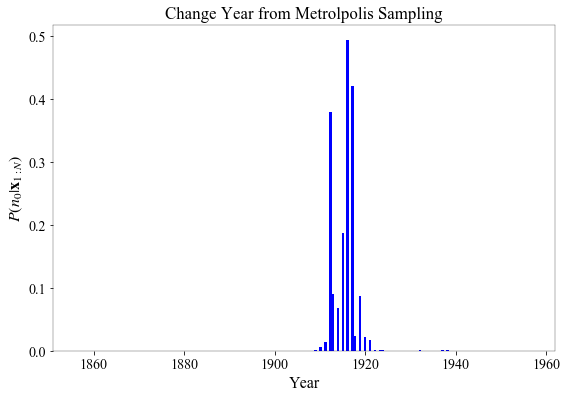

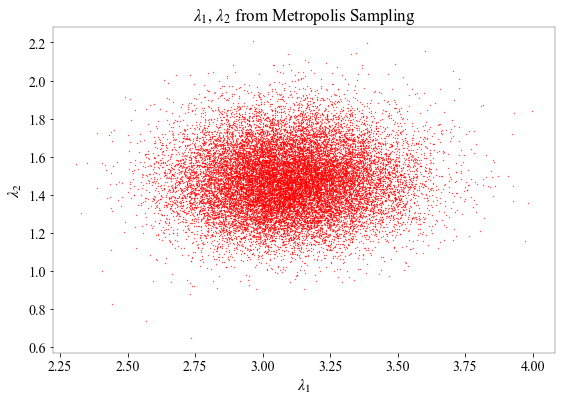

In [22]:
plt.hist(metro_change_year, 100, color='b', label='$n_0$', density=True)
plt.xlim(1851, 1962)
plt.xlabel('Year')
plt.ylabel('$P(n_0|\mathbf{x}_{1:N})$')
plt.title('Change Year from Metrolpolis Sampling')
#plt.savefig('metro_hist', dpi=300)
plt.show()

plt.scatter(metro_l1, metro_l2, color='r', s=0.1)
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.title('$\lambda_1$, $\lambda_2$ from Metropolis Sampling')
#plt.savefig('metro_scatter', dpi=300)
plt.show()

In [23]:
print('mean(change_year) = ', np.mean(metro_change_year))
print('mean(lambda_1) =    ', np.mean(metro_l1))
print('mean(lambda_2) =    ', np.mean(metro_l2))

mean(change_year) =  1915.30905
mean(lambda_1) =     3.0967302273126083
mean(lambda_2) =     1.4766563519730989


In [24]:
metro_l1_means, metro_l1_errs = get_means(np.array(metro_l1))
metro_l2_means, metro_l2_errs = get_means(np.array(metro_l2))
metro_change_year_means, metro_change_year_errors = get_means(np.array(metro_change_year))

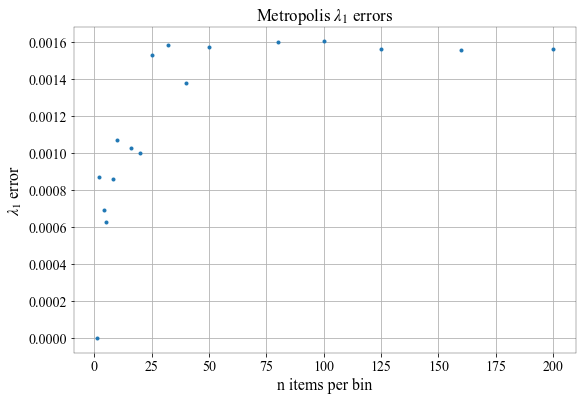

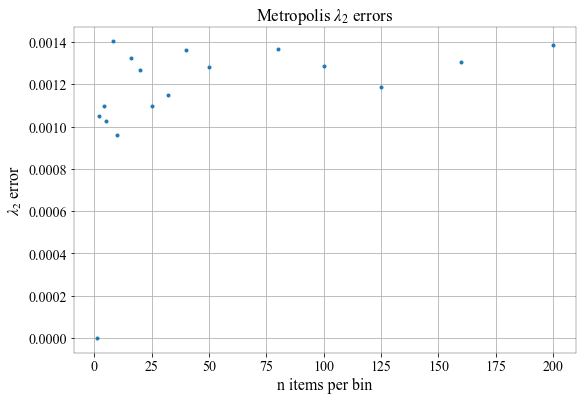

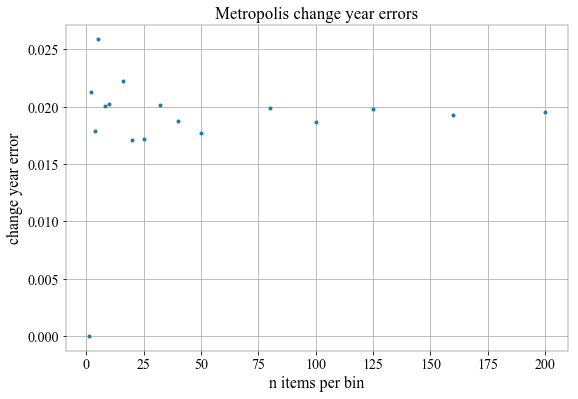

In [27]:
n = -int(0.45*len(metro_l1_errs))

rcParams['axes.grid']=True
plt.plot(list(metro_l1_errs)[:n], list(metro_l1_errs.values())[:n], '.')
plt.title('Metropolis $\lambda_1$ errors')
plt.xlabel('n items per bin')
plt.ylabel('$\lambda_1$ error')
#plt.savefig('metro_l1_error', dpi=300)
plt.show()

plt.plot(list(metro_l2_errs)[:n], list(metro_l2_errs.values())[:n], '.')
plt.title('Metropolis $\lambda_2$ errors')
plt.xlabel('n items per bin')
plt.ylabel('$\lambda_2$ error')
#plt.savefig('metro_l2_error', dpi=300)
plt.show()

plt.plot(list(metro_change_year_errors)[:n], list(metro_change_year_errors.values())[:n], '.')
plt.title('Metropolis change year errors')
plt.xlabel('n items per bin')
plt.ylabel('change year error')
#plt.savefig('metro_change_year_error', dpi=300)
plt.show()
rcParams['axes.grid']=False

In [26]:
print('N of items per bin: ', list(metro_l1_errs)[n-1])
print('lambda_1 error:     ', list(metro_l1_errs.values())[n-1])
print('lambda_2 error:     ', list(metro_l2_errs.values())[n-1])
print('change year error:  ', list(metro_change_year_errors.values())[n-1])

N of items per bin:  200
lambda_1 error:      0.0015624688469545959
lambda_2 error:      0.0013886008850528357
change year error:   0.019571100824940544
